<a href="https://colab.research.google.com/github/hongnhan217/AI_Class/blob/main/useTrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir
import numpy as np
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array

In [ ]:
photos = np.load('/content/drive/MyDrive/pic_train/ten_dishes_photos.npy')
labels = np.load('/content/drive/MyDrive/pic_train/ten_dishes_labels.npy')

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.2)

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(4876, 150, 150, 3) (1219, 150, 150, 3)
(4876,) (1219,)


In [ ]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train,11)
y_test = to_categorical(y_test,11)

print(y_train.shape,y_test.shape)

(4876, 11) (1219, 11)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
])

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dense(11,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
model.fit(x_train,y_train,epochs=20,batch_size=64,verbose=1)

Epoch 1/20
77/77 [==============================] - 14s 46ms/step - loss: 2.1769 - accuracy: 0.2315
Epoch 2/20
77/77 [==============================] - 3s 42ms/step - loss: 1.8264 - accuracy: 0.3568
Epoch 3/20
77/77 [==============================] - 3s 45ms/step - loss: 1.5814 - accuracy: 0.4539
Epoch 4/20
77/77 [==============================] - 3s 42ms/step - loss: 1.3122 - accuracy: 0.5566
Epoch 5/20
77/77 [==============================] - 3s 42ms/step - loss: 1.0399 - accuracy: 0.6440
Epoch 6/20
77/77 [==============================] - 3s 42ms/step - loss: 0.6546 - accuracy: 0.7826
Epoch 7/20
77/77 [==============================] - 3s 44ms/step - loss: 0.3350 - accuracy: 0.8964
Epoch 8/20
77/77 [==============================] - 3s 43ms/step - loss: 0.1379 - accuracy: 0.9633
Epoch 9/20
77/77 [==============================] - 3s 43ms/step - loss: 0.0682 - accuracy: 0.9856
Epoch 10/20
77/77 [==============================] - 3s 42ms/step - loss: 0.0411 - accuracy: 0.9932
Epoch 11

In [ ]:
from keras.models import load_model
model.save('/content/drive/MyDrive/Colab Notebooks/test1.h5')


In [ ]:
model1 = load_model('/content/drive/MyDrive/Colab Notebooks/test1.h5')

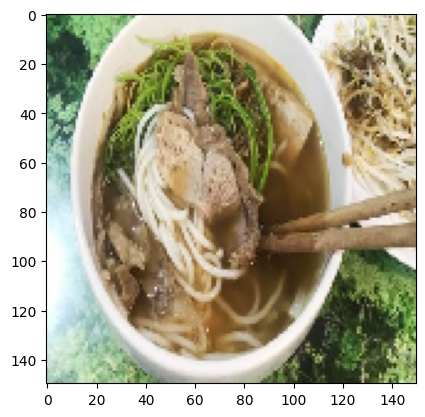

so: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
digit = x_test[625]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print("so:",y_test[625])

In [ ]:
classes = ['banhBeo', 'banhBotLoc', 'banhXeo', 'banhGio', 'banhChung',
           'banhTet', 'goiCuon', 'bunRieu', 'pho', 'bunBoHue']
img = x_test[625]
img = np.expand_dims(img, axis=0)
res = model1.predict(img)
print("predict: ",classes[np.argmax(res[0])],(res[0]))


1/1 [==============================] - 0s 27ms/step
predict:  bunBoHue [3.1270114e-15 5.4350725e-08 4.2864056e-05 3.0275541e-07 4.9098045e-08
 1.8939763e-06 4.3966562e-08 1.8513336e-07 1.4678764e-04 9.9880111e-01
 1.0067072e-03]
